# 描述性统计方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings

In [2]:
# 查看有什么字体
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = list(f.name for f in fm.ttflist)
npfont= np.array(mat_fonts)
# npfont=np.insert(npfont,0,[1,1],0)  # 网友鸿鹄意见:插入陌生元素补齐
b=np.empty(2,dtype = np.uint8)        # 牧码人老师意见:生成列表
npfont=np.hstack((npfont,b)).reshape((-1,4)) #然后hstack
# npfont=npfont.reshape((-1,4))
data = pd.DataFrame(npfont,columns=[1,2,3,4])
data.sample(50)

,1,2,3,4
93,.SF NS Text Condensed,Opus Special Extra Std,.SF Compact Rounded,Opus Note Names Std
48,Geeza Pro,Helvetica Neue,Superclarendon,.SF Compact Display
59,Papyrus,Corsiva Hebrew,Apple Braille,Verdana
23,.SF NS Display Condensed,.SF Compact Text,Reprise Stamp Std,Chalkboard SE
69,Verdana,Nadeem,Raanana,Opus Figured Bass Extras Std
36,Chalkduster,Al Tarikh,Sinhala Sangam MN,Arial Rounded MT Bold
5,DejaVu Serif,cmr10,cmss10,DejaVu Sans Mono
35,Avenir Next,STIXIntegralsUpD,Reprise Special Std,Seravek
86,Avenir Next Condensed,.SF NS Text Condensed,Luminari,Lao Sangam MN
83,.Helvetica Neue DeskInterface,Charter,Telugu MN,Bradley Hand


In [3]:
sns.set(style='darkgrid')
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

In [4]:
# 加载鸢尾花数据集
iris =load_iris()
# display(iris)
display(iris.data[:10],iris.target[:10])
display(iris.feature_names,iris.target_names)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# 将鸢尾花数据与对应的类型合并,组合成完整记录(-1,1 的-1是任意行的意思)
data = np.concatenate([iris.data,iris.target.reshape(-1,1)],axis=1)
data = pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width','type'])
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,type
115,6.4,3.2,5.3,2.3,2.0
106,4.9,2.5,4.5,1.7,2.0
95,5.7,3.0,4.2,1.2,1.0
123,6.3,2.7,4.9,1.8,2.0
92,5.8,2.6,4.0,1.2,1.0
35,5.0,3.2,1.2,0.2,0.0
26,5.0,3.4,1.6,0.4,0.0
74,6.4,2.9,4.3,1.3,1.0
75,6.6,3.0,4.4,1.4,1.0
38,4.4,3.0,1.3,0.2,0.0


In [30]:
# 我们以type类型列为例子,计算频数频率
frequency = data["type"].value_counts()
display(frequency)
# 计算频率,用%表示
percentage= frequency*100 / len(data)
display(percentage)

2.0    50
1.0    50
0.0    50
Name: type, dtype: int64

2.0    33.333333
1.0    33.333333
0.0    33.333333
Name: type, dtype: float64

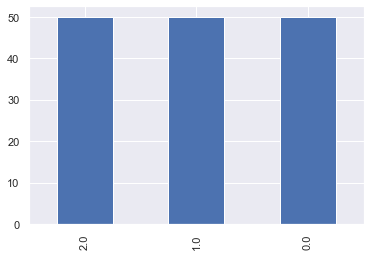

In [7]:
# 来展示一下
# frequency.plot(kind='pie')
frequency.plot(kind='bar')

我们以花萼长度(sepal_length)为例,计算均值\中位数\众数

In [8]:
# 计算花萼长度均值
mean= data['sepal_length'].mean()
# 计算花萼长度中位数
median = data['sepal_length'].median()
# 计算花萼长度众数
s = data['sepal_length'].value_counts()
mode = s.index[0]
display(mean,median,mode)

5.843333333333335

5.8

5.0

我们也可用scipy中stats模块来求一组数据众数

In [9]:
from scipy import stats
stats.mode(data['sepal_length']).mode

array([5.])

鸢尾花的花萼长度列,均值与中值几乎相等,我们猜想,数据应该是对称分布的,所以看看

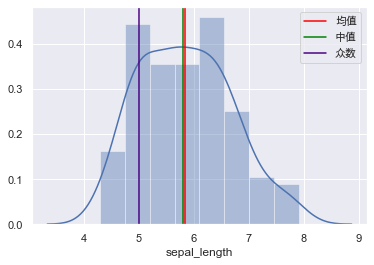

In [10]:
sns.distplot(data['sepal_length'])
plt.axvline(mean, ls='-',color='red',label='均值')
plt.axvline(median, ls='-',color='green',label='中值')
plt.axvline(mode, ls='-',color='indigo',label='众数')
plt.legend()

分位数

In [11]:
x=np.arange(10,19)
n=len(x)
q1_index=1+(n-1)*0.25
q2_index=1+(n-1)*0.50
q3_index=1+(n-1)*0.75
print( q1_index,q2_index,q3_index)

3.0 5.0 7.0


拿上边的数当做索引位置,进行数据索引

In [12]:
index= np.array([q1_index,q2_index,q3_index]).astype(np.int32)
index -=1
display(x[index])

array([12, 14, 16])

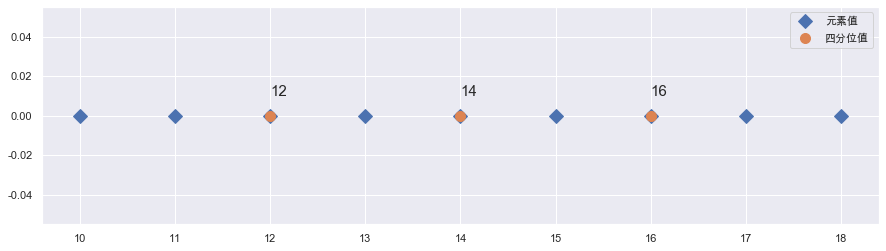

In [13]:
plt.figure(figsize=(15,4))
plt.xticks(x)
plt.plot(x       ,np.zeros(len(x))    ,ls='',marker='D',ms=10, label= '元素值')
plt.plot(x[index],np.zeros(len(index)),ls='',marker='o',ms=10, label='四分位值')
for v in x[index]:
    plt.text(v,0.01 ,s=v , fontsize=15)
plt.legend()

index不是整数的情况
当index不是整数的时候,我们使用最近位置的两个数,来加权计算得到四分卫位置,每个整数的权重为距离的反比

In [14]:
x = np.arange(10,20)
n = len(x)
q1_index=1+(n-1)*0.25
q2_index=1+(n-1)*0.50
q3_index=1+(n-1)*0.75
print( q1_index,q2_index,q3_index)

3.25 5.5 7.75


计算结果不是整数,我们使用该值临近的两个整数来计算四分位值

In [15]:
index= np.array([q1_index,q2_index,q3_index])
left  = np.floor(index).astype(np.int32)-1
right = np.ceil(index).astype(np.int32)-1
weight,_ = np.modf(index)
# np.modf(index)
q= x[left]*(1-weight)+ x[right]*weight
display(q)

array([12.25, 14.5 , 16.75])

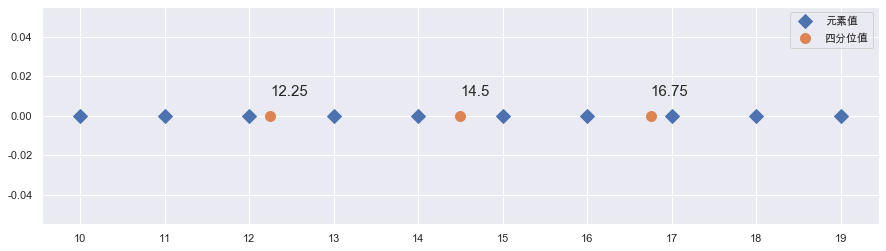

In [16]:
plt.figure(figsize=(15,4))
plt.xticks(x)
plt.plot(x,np.zeros(len(x)),ls='',marker='D',ms=10, label= '元素值')
plt.plot(q,np.zeros(len(q)),ls='',marker='o',ms=10, label='四分位值')
for v in q:
    plt.text(v,0.01 ,s=v , fontsize=15)
plt.legend()

### Numpy 和Pandas都提供了分位数计算方法,上边是自己造轮子方法,下边调用API

Numpy中的方法

In [17]:
# Numpy 法
x= [1,3,10,15,18,20,21,33,40]
print(np.quantile(x,[0.25,0.5,0.75]))
x= [1,3,10,15,18,20,23,40]
print(np.quantile(x,[0.25,0.5,0.75]))

[10. 18. 21.]
[ 8.25 16.5  20.75]


Pandas中的方法

In [18]:
x= [1,3,10,15,18,20,21,33,40]
s=pd.Series(x)
display(s.describe())

x= [1,3,10,15,18,20,23,40]
s=pd.Series(x)
display(s.describe())

count     9.000000
mean     17.888889
std      12.791056
min       1.000000
25%      10.000000
50%      18.000000
75%      21.000000
max      40.000000
dtype: float64

count     8.000000
mean     16.250000
std      12.395276
min       1.000000
25%       8.250000
50%      16.500000
75%      20.750000
max      40.000000
dtype: float64

In [19]:
warnings.filterwarnings('default')
type(s.describe())
s.describe()['25%']   #方法1
# s.describe()[4]       #方法2
# s.describe().iloc[4]  #方法3
# s.describe().loc['25%']  #方法4
# s.describe().ix[4]  #方法5
# s.describe().ix['25%']  #方法5

8.25

默认情况下,describe方法将会统计四分位值,我们可以通过percentiles参数自定义需要统计的分位,如下

In [20]:
s.describe(percentiles=[0.15,0.22,0.33,0.6,0.9])

count     8.000000
mean     16.250000
std      12.395276
min       1.000000
15%       3.350000
22%       6.780000
33%      11.550000
50%      16.500000
60%      18.400000
90%      28.100000
max      40.000000
dtype: float64

花萼长度为例 极差\方差\标准差

In [21]:
# 计算极差
sub = data ['sepal_length'].max()-data ['sepal_length'].min()
# 计算方差
var = data['sepal_length'].var()
# 计算标准差
std = data['sepal_length'].std()
print(sub,var,std)

3.6000000000000005 0.6856935123042505 0.8280661279778629


鸢尾花数据中,花瓣长度方差较大,花瓣宽度方差较小,我们可以绘图进行一下对比.

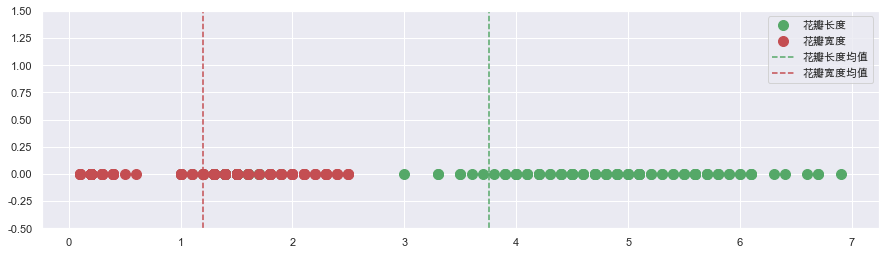

In [22]:
plt.figure(figsize=(15,4))
plt.ylim(-0.5,1.5)
plt.plot(data['petal_length'],np.zeros(len(data)),ls='',marker='o',ms=10 , color='g',label='花瓣长度')
plt.plot(data['petal_width'] ,np.zeros(len(data)),ls='',marker='o',ms=10 , color='r',label='花瓣宽度')
plt.axvline(data['petal_length'].mean(),ls='--',color='g', label='花瓣长度均值')
plt.axvline(data['petal_width'].mean(),ls='--',color='r', label='花瓣宽度均值')
plt.legend()
plt.show()

-0.982896874295791 0.9411493904324898


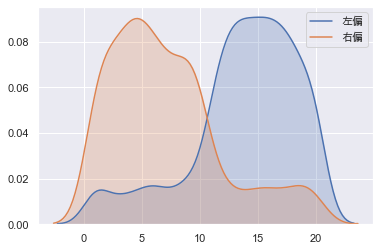

In [23]:
# 构造左偏分布数据
t1 = np.random.randint(1,11, size=100)
t2 = np.random.randint(11,21, size=500)
t3 = np.concatenate([t1,t2])
left_skew = pd.Series(t3)
# 构造右偏分布数据
t1 = np.random.randint(1,11, size=500)
t2 = np.random.randint(11,21, size=100)
t3 = np.concatenate([t1,t2])
right_skew = pd.Series(t3)
print(left_skew.skew(),right_skew.skew())
sns.kdeplot(left_skew,shade=True ,label='左偏')
sns.kdeplot(right_skew,shade=True ,label='右偏')
plt.legend()

标准正态分布峰度: -0.08372434518245875 标准差: 0.9985402302798879
花萼宽度峰度: 0.2282490424681929 标准差: 0.435866284936698
花瓣长度峰度: -0.5520640413156395 标准差: 0.8280661279778629


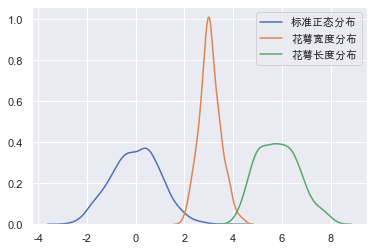

In [24]:
# 标准正态分布
standard_normal=pd.Series(np.random.normal(0,1,size=1000))
print('标准正态分布峰度:',standard_normal.kurt(),'标准差:',standard_normal.std())
print('花萼宽度峰度:',data['sepal_width'].kurt(),'标准差:',data['sepal_width'].std())
print('花瓣长度峰度:',data['sepal_length'].kurt(),'标准差:',data['sepal_length'].std())
sns.kdeplot(standard_normal, label='标准正态分布')
sns.kdeplot(data['sepal_width'], label='花萼宽度分布')
sns.kdeplot(data['sepal_length'], label='花萼长度分布')


# 推断统计分析

样本均值: 30.23052559148436
样本标准差: 10.012256047767597
偏度: 0.0041742306807772385


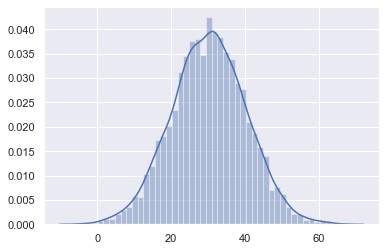

In [25]:
#  定义总体数据
all_ = np.random.normal(loc=30, scale=80 , size=10000)
# 创建均值数组
mean_arr = np.zeros(5000)
for i in range(len(mean_arr)):
    mean_arr[i]=np.random.choice(all_,size=64, replace=False).mean()
print('样本均值:', mean_arr.mean())
print('样本标准差:', mean_arr.std())
print('偏度:', pd.Series(mean_arr).skew())
sns.distplot(mean_arr)

In [26]:
# 定义标准差
scale=50
# 定义数据
x = np.random.normal(0,scale , size=100000)

# 定义标准差的倍数,倍数从1到3
for times in range(1,4):
    y=x[(x >= -times*scale)& (x<= times*scale)]
    print(f'{times}倍标准差:',end=' ')
    print(f'{len(y)*100/len(x)}%')

1倍标准差: 68.047%
2倍标准差: 95.492%
3倍标准差: 99.751%


总体的均值: 2558
一次抽样的样本的均值: 2559.974863824316
置信区间(95%置信度): (2543.343712330808, 2576.6060153178237)


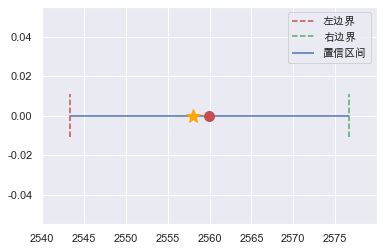

In [27]:
# 使用随机数生成总体均值,其值位置
mean= np.random.randint(-10000,10000)
# 定义总体标准差
std = 60
# 定义样本容量
n = 50
all_ = np.random.normal(loc = mean , scale = std , size =10000)
sample = np.random.choice(all_,size = n ,replace = False)
sample_mean = sample.mean()
print('总体的均值:', mean)
print('一次抽样的样本的均值:', sample_mean)

plt.plot(mean ,         0 , marker='*', color = 'orange',ms=15)
plt.plot(sample_mean ,  0 , marker='o', color='r'       ,ms=10)
# 计算标准误差
se= std/np.sqrt(n)   # np开方的方法
min_ = sample_mean-1.96*se
max_ = sample_mean + 1.96 *se
print('置信区间(95%置信度):', (min_,max_))
plt.xlim(sample_mean-20 ,sample_mean+20)
plt.hlines(0,xmin=min_ ,xmax= max_,colors='b',label='置信区间')
plt.axvline(min_,0.4,0.6,color='r',ls='--',label='左边界')
plt.axvline(max_,0.4,0.6,color='g',ls='--',label='右边界')
plt.legend()
plt.show()

In [28]:
# 鸢尾花平均花瓣长度3.5cm 这种说法可靠吗?
data['petal_length'].mean()

3.7580000000000027

In [29]:
mean=data['petal_length'].mean()
n=len(data)
sigma=1.8
z=(mean-3.5)/(1.8/np.sqrt(n))
print(z)

1.7554676489946293


# 线性回归

In [1]:
import numpy as np
# 用于线性回归的类
from sklearn.linear_model import LinearRegression
# 用来切分训练集与测试集
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# 设置输出的精度,默认为8
np.set_printoptions(precision=2)

iris=load_iris()
# 获取花瓣长度作为X,花瓣宽度作为Y
X ,y=iris.data[:,2].reshape(-1,1), iris.data[:,3]
lr = LinearRegression()
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=0)
lr.fit(X_train, y_train)
print('权重:',lr.coef_)
print('截距:',lr.intercept_)
# 从训练集学习到了模型参数(w与b),确定方程,就可以进行预测
y_hat=lr.predict(X_test)
print('实际值:',y_test[:5])
print('预测值:',y_hat[:5])

权重: [0.42]
截距: -0.3705841202176683
实际值: [2.4 1.  0.2 1.8 0.2]
预测值: [1.77 1.31 0.22 2.27 0.26]


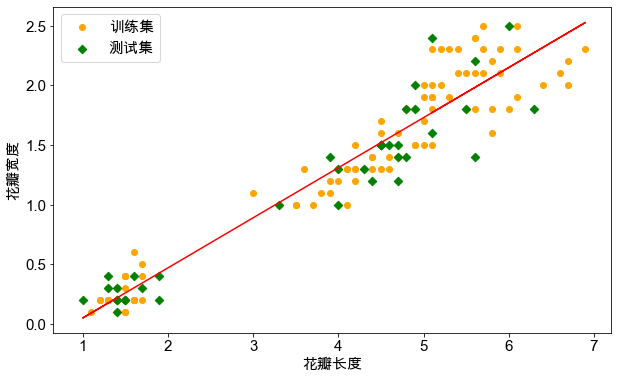

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=15

plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c='orange',label='训练集')
plt.scatter(X_test,y_test, c='g',marker='D',label='测试集')
plt.plot(X,lr.predict(X),'r-')
plt.legend()
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.show()

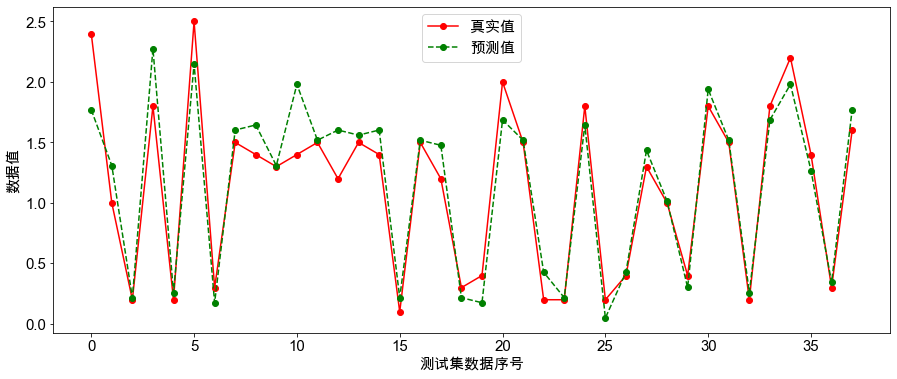

In [10]:
plt.figure(figsize=(15,6))
plt.plot(y_test,label='真实值' , color='r',marker='o')
plt.plot(y_hat ,label='预测值' ,ls='--',color='g',marker='o')
plt.xlabel('测试集数据序号')
plt.ylabel('数据值')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

print('均方误差(MSE):    ',mean_squared_error(y_test,y_hat))
print('根均方误差(RMSE): ',np.sqrt(mean_squared_error(y_test,y_hat)))
print('平均绝对值误差(MAE)',mean_absolute_error(y_test,y_hat))
print('训练集R^2 :       ',r2_score(y_train, lr.predict(X_train)))
print('测试集R^2 :       ',r2_score(y_test , y_hat))
# socre其实求解的就是 r^2 的值,但是注意,r2_score方法与score方法传递的参数内容是不同的 
print('训练接R^2 :       ',lr.score(X_train,y_train))
print('测试集R^2 :       ',lr.score(X_test ,y_test))

均方误差(MSE):     0.05212862079193859
根均方误差(RMSE):  0.2283169305854005
平均绝对值误差(MAE) 0.1673599103556632
训练集R^2 :        0.9358824215964661
测试集R^2 :        0.8931453922584154
训练接R^2 :        0.9358824215964661
测试集R^2 :        0.8931453922584154


### 多元线性回归


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd

boston=load_boston()
print('Type(boston):' ,type(boston))
X,y=boston.data, boston.target
print(type(X),type(y))
print(X.size,y.size)
df = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)],axis=1),
                 columns=boston.feature_names.tolist()+['MEDV'])
print(load_boston().DESCR)
df.head()

# df.size

Type(boston): <class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
6578 506
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM：城镇犯罪率

ZN：后院占地面积超过2.5万平方呎的住宅用地比例

INDUS：每个城镇的非零售商业用地的比例

CHAS：（= 1靠近;否则为0）是否靠近查尔斯河

NOX：一氧化氮浓度（10万份）硝酸盐浓度

RM：每个住宅的平均房间数

AGE：1940年以前建成的自住单位的比例

DIS：距离第五波士顿就业中心加权距离

RAD：径向高速公路的可达性指数

税收：每10,000美元的全值物业税率

PTRATIO：城镇的学生与教师比例

B：1000（Bk - 0.63）^ 2 城镇的黑人比例

LSTAT：下层经济阶层百分比

MEDV：1000美元的自住房屋的中位数


In [49]:
X_train, X_test , y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
print('模型权重   :',lr.coef_)
print('截 距     :',lr.intercept_)
y_hat =lr.predict(X_test)
print('训练接R^2 :',lr.score(X_train,y_train))
print('测试集R^2 :',lr.score(X_test ,y_test))

模型权重   : [-1.18e-01  4.40e-02 -5.77e-03  2.39e+00 -1.56e+01  3.77e+00 -7.04e-03
 -1.43e+00  2.40e-01 -1.13e-02 -9.86e-01  8.44e-03 -4.99e-01]
截 距     : 36.933255457118975
训练接R^2 : 0.7697699488741149
测试集R^2 : 0.6354638433202128


In [79]:
X_train.size # 4927
y_train.size #379
X_test.size # 1651
y_test.size #127


127

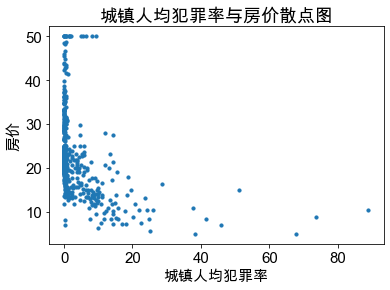

In [99]:
plt.scatter(df['CRIM'], y,10)
plt.title('城镇人均犯罪率与房价散点图')
plt.xlabel('城镇人均犯罪率')
plt.ylabel('房价')
plt.show()

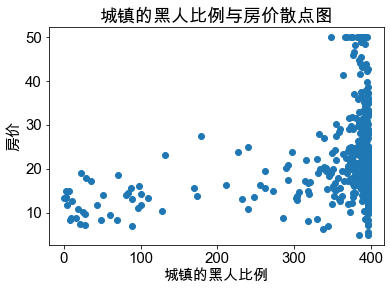

In [98]:
plt.scatter(df['B'], y)
plt.title('城镇的黑人比例与房价散点图')
plt.xlabel('城镇的黑人比例')
plt.ylabel('房价')
plt.show()

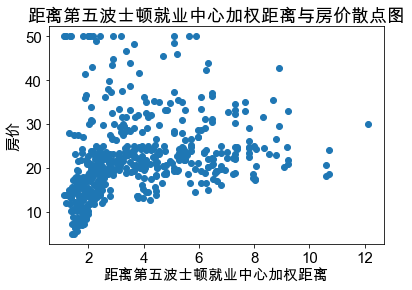

In [101]:
plt.scatter(df['DIS'], y)
plt.title('距离第五波士顿就业中心加权距离与房价散点图')
plt.xlabel('距离第五波士顿就业中心加权距离')
plt.ylabel('房价')
plt.show()

以上就是描述性统计方法涉及的代码部分, 相关概念笔记见'`描述性统计分析概念汇总.MD `'